<a href="https://colab.research.google.com/github/HP-Balasubramanya/ML-PROJECT/blob/master/wine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# For this kernel, I am only using the rewhite wine dataset
data = pd.read_csv('/content/datasets_4458_8204_winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
extra = data[data.duplicated()]
extra.shape

(240, 12)

In [ ]:
# Let's proceed to separate 'quality' as the target variable and the rest as features.
y = data.quality                  # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)           # check correctness

(1599,) (1599, 11)


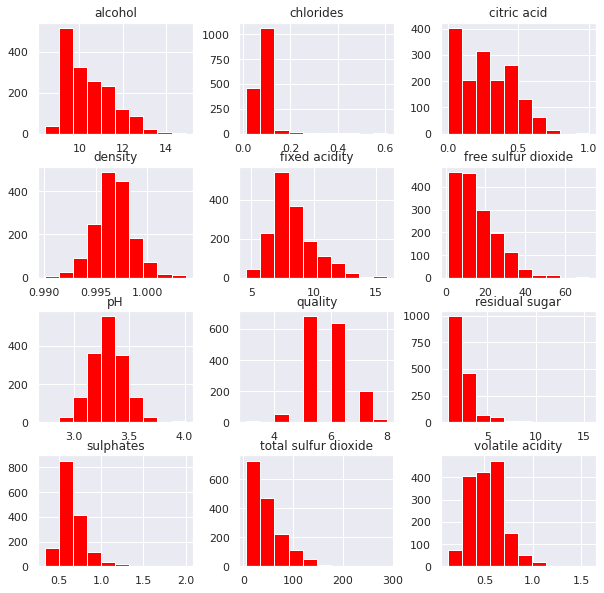

In [ ]:
# data.hist(figsize=(10,10))
sns.set()
data.hist(figsize=(10,10), color='red')
plt.show()

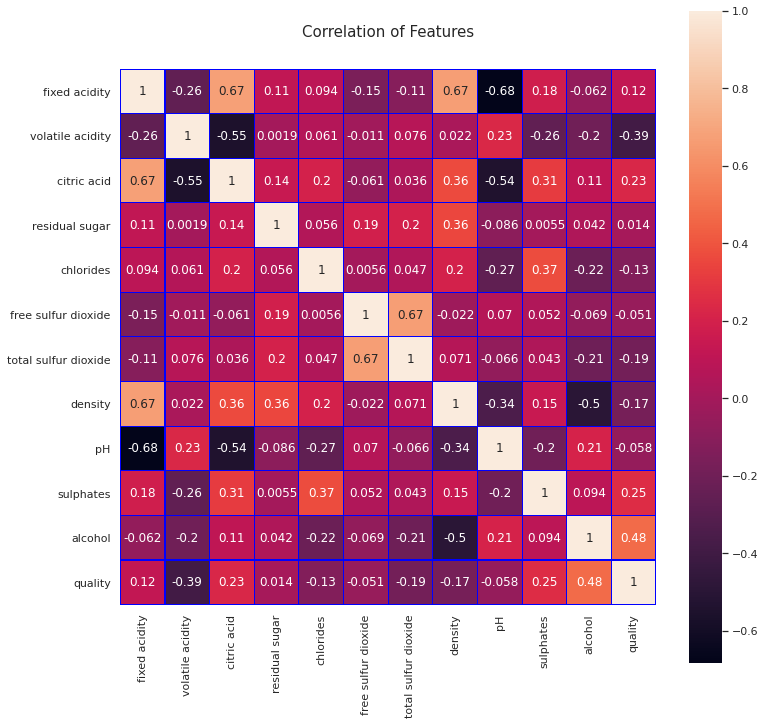

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='blue', annot=True)

In [ ]:
# Create a new y1
y1 = (y > 5).astype(int)
y1.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

Text(0.5, 0, 'aggregated target value')

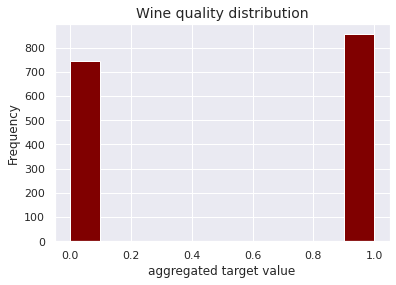

In [ ]:
# plot histogram
ax = y1.plot.hist(color='maroon')
ax.set_title('Wine quality distribution', fontsize=14)
ax.set_xlabel('aggregated target value')

In [ ]:
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,
                                                    random_state=seed)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3918, 11) (980, 11) (3918,) (980,)


In [ ]:
# Instantiate the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=seed)
RF_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
# Compute k-fold cross validation on training dataset and see mean accuracy score
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [0.82142857 0.83673469 0.82397959 0.86734694 0.83418367 0.80867347
 0.81377551 0.81887755 0.81329923 0.86700767]
The mean accuracy score is 0.8305306905370845


In [ ]:
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)

In [ ]:
# Print 5 results to see
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_RF[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  1
Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  1
Actual wine quality is  1  and predicted is  1


In [ ]:
print(accuracy_score(y_test, pred_RF))
print(log_loss(y_test, pred_RF))

0.8418367346938775
5.462846429955864


In [ ]:
print(confusion_matrix(y_test, pred_RF))

[[230  99]
 [ 56 595]]


In [ ]:
# Import and istantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=seed)
LR_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Compute cross validation scores on training dataset and see mean score
cv_scores = cross_val_score(LR_clf, X_train, y_train, cv=10, scoring='accuracy')
print('The cv scores from the iterations are {}'.format(cv_scores))
print('The mean cv score is {}'.format(cv_scores.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The cv scores from the iterations are [0.72959184 0.76530612 0.71683673 0.7244898  0.74489796 0.70663265
 0.72704082 0.76020408 0.76726343 0.76726343]
The mean cv score is 0.740952685421995


In [ ]:
LR_clf.fit(X_train, y_train)
pred_LR = LR_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Print 5 results to see
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_LR[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  1
Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  1
Actual wine quality is  1  and predicted is  1


In [ ]:
print(accuracy_score(y_test, pred_LR))
print(log_loss(y_test, pred_LR))

0.7602040816326531
8.2823995742417


In [ ]:
print(confusion_matrix(y_test, pred_LR))

[[155 174]
 [ 61 590]]


In [ ]:

grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_RF = GridSearchCV(RF_clf,param_grid=grid_values,scoring='accuracy')


In [ ]:
RF_clf = RandomForestClassifier(n_estimators=100,random_state=seed)
RF_clf.fit(X_train,y_train)
pred_RF = RF_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,pred_RF))
print(log_loss(y_test,pred_RF))

0.8418367346938775
5.462846429955864


In [ ]:
print(confusion_matrix(y_test,pred_RF))

[[230  99]
 [ 56 595]]


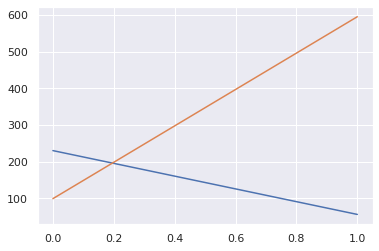

In [ ]:
plt.plot(confusion_matrix(y_test,pred_RF))